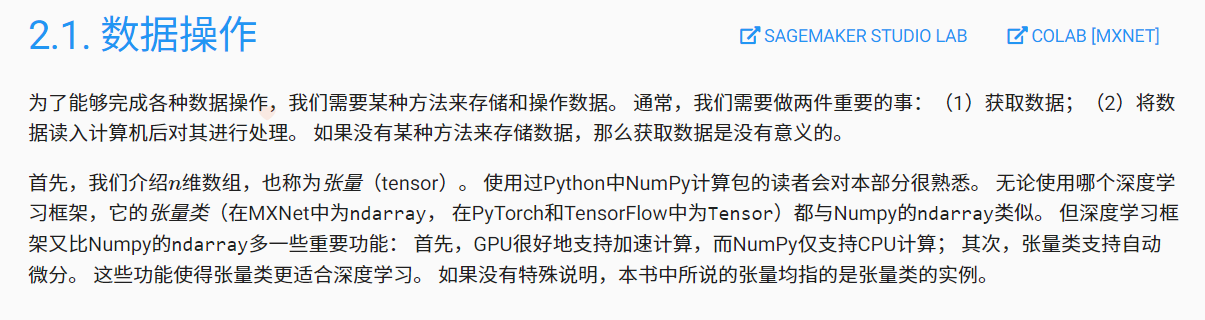

# 1. 入门

In [2]:
import torch

In [3]:
# 创建一个行向量 x
# 0开始的前12个整数

x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
# 张量的shape属性来访问张量（沿每个轴的长度）的形状 

x.shape

torch.Size([12])

In [5]:
# 张量中元素的总数

x.numel()

12

In [6]:
# 改变一个张量的形状而不改变元素数量和元素值

X = x.reshape(3, 4)
X

# 我们可以通过-1来调用此自动计算出维度的功能

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [10]:
x.reshape(-1, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [11]:
x.reshape(3, -1)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [8]:
X.shape


torch.Size([3, 4])

In [9]:
X.numel()


12

In [12]:
# 创建一个形状为（2,3,4）的张量，其中所有元素都设置为0

torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [13]:
# 创建一个形状为(2,3,4)的张量，其中所有元素都设置为1

torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [14]:
# 创建一个形状为（3,4）的张量。 其中的每个元素都从均值为0、标准差为1的标准高斯分布（正态分布）中随机采样


torch.randn(3, 4)

tensor([[-0.2398, -0.8621, -1.4464, -1.6441],
        [ 0.8848, -0.3523, -2.0753, -0.1552],
        [ 0.1883,  1.3400, -2.0555,  1.7827]])

In [15]:
# 包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值。 在这里，最外层的列表对应于轴0，内层的列表对应于轴1.


torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

# 2. 运算符

In [16]:
# 对于任意具有相同形状的张量， 常见的标准算术运算符（+、-、*、/和**）都可以被升级为按元素运算


x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [17]:
# “按元素”方式可以应用更多的计算，包括像求幂这样的一元运算符.


torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

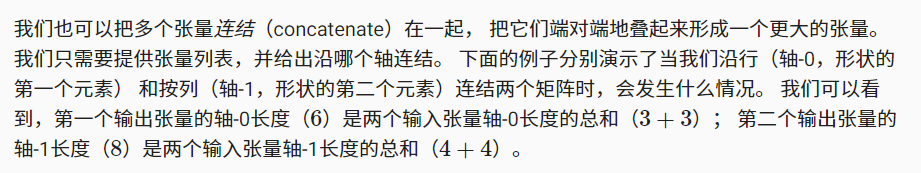

In [19]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
X,Y

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[2., 1., 4., 3.],
         [1., 2., 3., 4.],
         [4., 3., 2., 1.]]))

In [20]:
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [21]:
# 通过逻辑运算符构建二元张量。 以X == Y为例： 对于每个位置，如果X和Y在该位置相等，则新张量中相应项的值为1。 这意味着逻辑语句X == Y在该位置处为真，否则该位置为0.


X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [22]:
# 对张量中的所有元素进行求和，会产生一个单元素张量.


X.sum()

tensor(66.)

# 3. 广播机制

这种机制的工作方式如下：

1. 通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状；

2. 对生成的数组执行按元素操作。

In [23]:
# 在大多数情况下，我们将沿着数组中长度为1的轴进行广播


a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

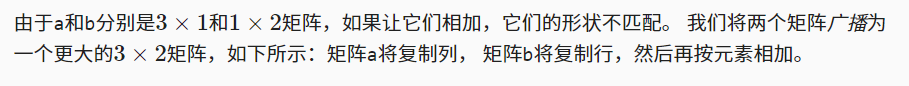

In [24]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

# 4. 索引和切片

第一个元素的索引是0，最后一个元素索引是-1； 可以指定范围以包含第一个元素和最后一个之前的元素。

In [25]:
# [-1]选择最后一个元素，可以用[1:3]选择第二个和第三个元素

X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [26]:
# 可以通过指定索引来将元素写入矩阵.


X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [27]:
# 为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值。 例如，[0:2, :]访问第1行和第2行，其中“:”代表沿轴1（列）的所有元素。 虽然我们讨论的是矩阵的索引，但这也适用于向量和超过2个维度的张量.


X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

# 5. 节省内存

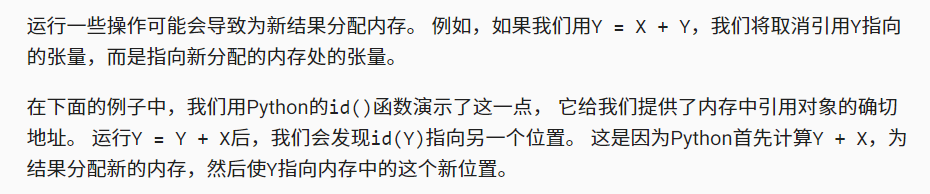

In [28]:
before = id(Y)
Y = Y + X
id(Y) == before

False

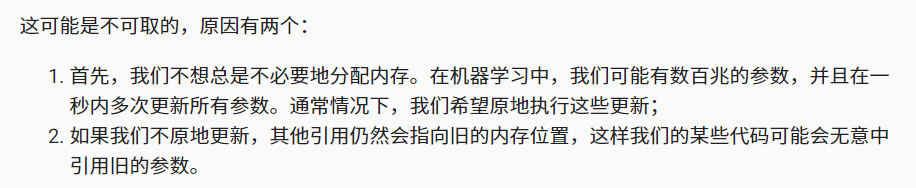

幸运的是，执行原地操作非常简单。 我们可以使用切片表示法将操作的结果分配给先前分配的数组，例如Y[:] = <expression>。 为了说明这一点，我们首先创建一个新的矩阵Z，其形状与另一个Y相同， 使用zeros_like来分配一个全$0$
的块。

In [29]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 2195217302128
id(Z): 2195217302128


如果在后续计算中没有重复使用X， 我们也可以使用X[:] = X + Y或X += Y来减少操作的内存开销。

In [30]:
before = id(X)
X += Y
id(X) == before

True

# 6. 转换为其他Python对象

将深度学习框架定义的张量转换为NumPy张量（ndarray）很容易，反之也同样容易。 torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量。

In [31]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [32]:
# 要将大小为1的张量转换为Python标量，我们可以调用item函数或Python的内置函数.


a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)